compilation time: 0.026001453399658203
Train on 778 samples, validate on 16 samples
Epoch 1/1
778/778 [==============================] - 7s 9ms/step - loss: 0.0017 - val_loss: 1.5264e-04
num is :  11.0


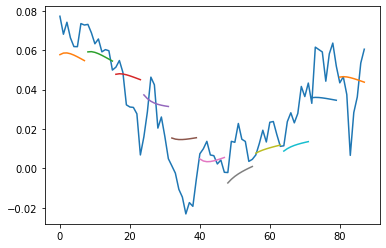

88/88 [==============================] - 0s 2ms/step
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, None, 300)         362400    
_________________________________________________________________
dropout_21 (Dropout)         (None, None, 300)         0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_11 (Activation)   (None, 1)                 0         
Total params: 522,901
Trainable params: 522,901
Non-trainable para

'\nmodel.save("stock_pridict.h5")\n'

In [11]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time
from keras.models import load_model

X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

#print(X_train, y_train, X_test, y_test)


#init model
model = Sequential();

#히든 레이어를 300개로 설정.
model.add( LSTM( input_dim = 1, output_dim = 300, return_sequences = True ) )
#과대적합을 피하기 위한 20% 버리기
model.add( Dropout( 0.2 ) )

model.add( LSTM( 100, return_sequences = False ) )
model.add( Dropout( 0.2 ) )

model.add( Dense( output_dim = 1 ) )
model.add( Activation( 'linear' ) )

'''
model = load_model("stock_pridict.h5")
'''

start = time.time()
model.compile( loss = 'mse', optimizer = 'rmsprop' )
print( 'compilation time:',time.time()-start )


#train model. until target status.
model.fit( X_train, y_train, batch_size = 64, epochs = 1, validation_split = 0.02 )


predictions = lstm.predict_sequences_multiple(model, X_test, 50, 8)
lstm.plot_results_multiple(predictions, y_test, 8)

model.evaluate( X_test, y_test, batch_size = 64 )
model.summary()

'''
model.save("stock_pridict.h5")
'''